In [3]:
##nlp used: LSTM- long short term memory - using it to predict stock price of apple using past 60 day stok price

In [170]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date,timedelta

In [171]:
import yfinance as yf

dateToday = date.today()- timedelta(days=1)
# getting info
df = yf.download('AAPL', start='2012-02-01', end=(dateToday))

# showing data received
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-02-01,16.371786,16.392500,16.269644,16.292500,13.758615,270046000
2012-02-02,16.282143,16.327499,16.213572,16.254286,13.726340,186796400
2012-02-03,16.332144,16.428572,16.270000,16.417143,13.863871,286599600
2012-02-06,16.370714,16.606428,16.364286,16.570356,13.993256,249412800
2012-02-07,16.616072,16.776787,16.592142,16.743929,14.139832,316223600
...,...,...,...,...,...,...
2024-08-26,226.759995,227.279999,223.889999,227.179993,227.179993,30602200
2024-08-27,226.000000,228.850006,224.889999,228.029999,228.029999,35934600
2024-08-28,227.919998,229.860001,225.679993,226.490005,226.490005,38052200


In [172]:
print(dateToday)

2024-09-02


In [173]:
#getting shape of plot
df.shape

(3166, 6)

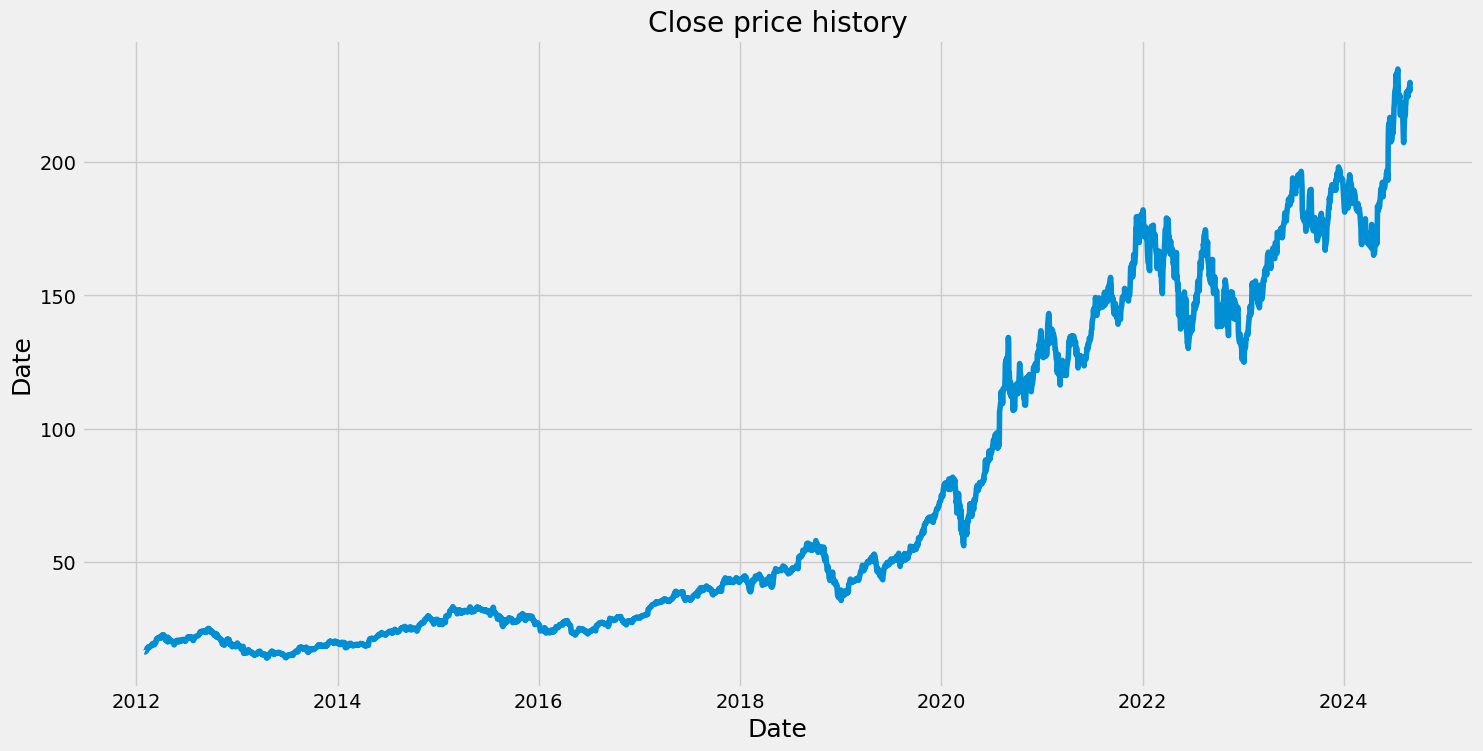

In [174]:
#visualizing closing price history
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Date', fontsize=18)
plt.show()

In [175]:
#create new dataframe with only close column
data=df.filter(['Close'])
#converting dataframe to numpy array
dataset = data.values
#get num of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)
print(training_data_len)

2533


In [176]:
#scaling data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.01061698],
       [0.01044397],
       [0.0111813 ],
       ...,
       [0.96228593],
       [0.97722662],
       [0.97364992]])

In [177]:
#creating training dataset
#creating scaled training dataset
train_data = scaled_data[0:training_data_len, :]

#Splitting data to train x and y axis seperate, y_train is target training set, x_train is independent training set
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if (i<=61):
        print(x_train,y_train)

[array([0.01061698, 0.01044397, 0.0111813 , 0.01187498, 0.01266083,
       0.01393014, 0.01659652, 0.01663694, 0.01812132, 0.01923055,
       0.01732415, 0.01805825, 0.0180437 , 0.0201021 , 0.01980942,
       0.0203511 , 0.02132451, 0.0218662 , 0.02342657, 0.02456329,
       0.02489154, 0.02500635, 0.02306276, 0.02259383, 0.02266337,
       0.02449054, 0.02500473, 0.02610912, 0.02871243, 0.03218567,
       0.03153564, 0.03153726, 0.03404841, 0.03483426, 0.03427478,
       0.03376382, 0.03323184, 0.03499918, 0.03621191, 0.03671963,
       0.03546487, 0.03379778, 0.03688295, 0.03861148, 0.03780138,
       0.03931648, 0.0397288 , 0.03846919, 0.03810699, 0.03755236,
       0.03471621, 0.03065764, 0.03543899, 0.03521909, 0.03183963,
       0.0295015 , 0.02929453, 0.02744796, 0.0354875 , 0.0351156 ])] [0.03435562472989717]
[array([0.01061698, 0.01044397, 0.0111813 , 0.01187498, 0.01266083,
       0.01393014, 0.01659652, 0.01663694, 0.01812132, 0.01923055,
       0.01732415, 0.01805825, 0.018

In [178]:
#converting x_train and y_train to numpy arrays to train LSTM models
x_train, y_train = np.array(x_train), np.array(y_train)

In [179]:
#reshape the data to add a third dimension for the LSTM model
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2473, 60, 1)

In [180]:
# Building LSTM model
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))  # Explicitly define the input layer
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [181]:
#compiling model
model.compile(optimizer='adam',loss='mean_squared_error')

In [182]:
#Training model
model.fit(x_train,y_train,batch_size=1, epochs=1)

2473/2473 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 0.0019


In [183]:
#Creating testing dataset
#Creating a new array containing scaled data from index 1526 to 1982
#Its going to act as the descaled testing dataset
test_data=scaled_data[training_data_len-60:,:]

#creating the datasets: x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [184]:
#Converting test dataset to a numpy array to use in the LSTM model
x_test=np.array(x_test)


In [185]:
#Reshape the data to convert it to 3D
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(633, 60, 1)

In [186]:
#Getting the models predicted price values for x_test dataset
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [187]:
#evaluating model by getting rms error - lower values of this error show better fit of model
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

1.8671463398383503

/var/folders/ds/1c27jzws0fbf32_3mxyr_m3h0000gn/T/ipykernel_50009/2183940405.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


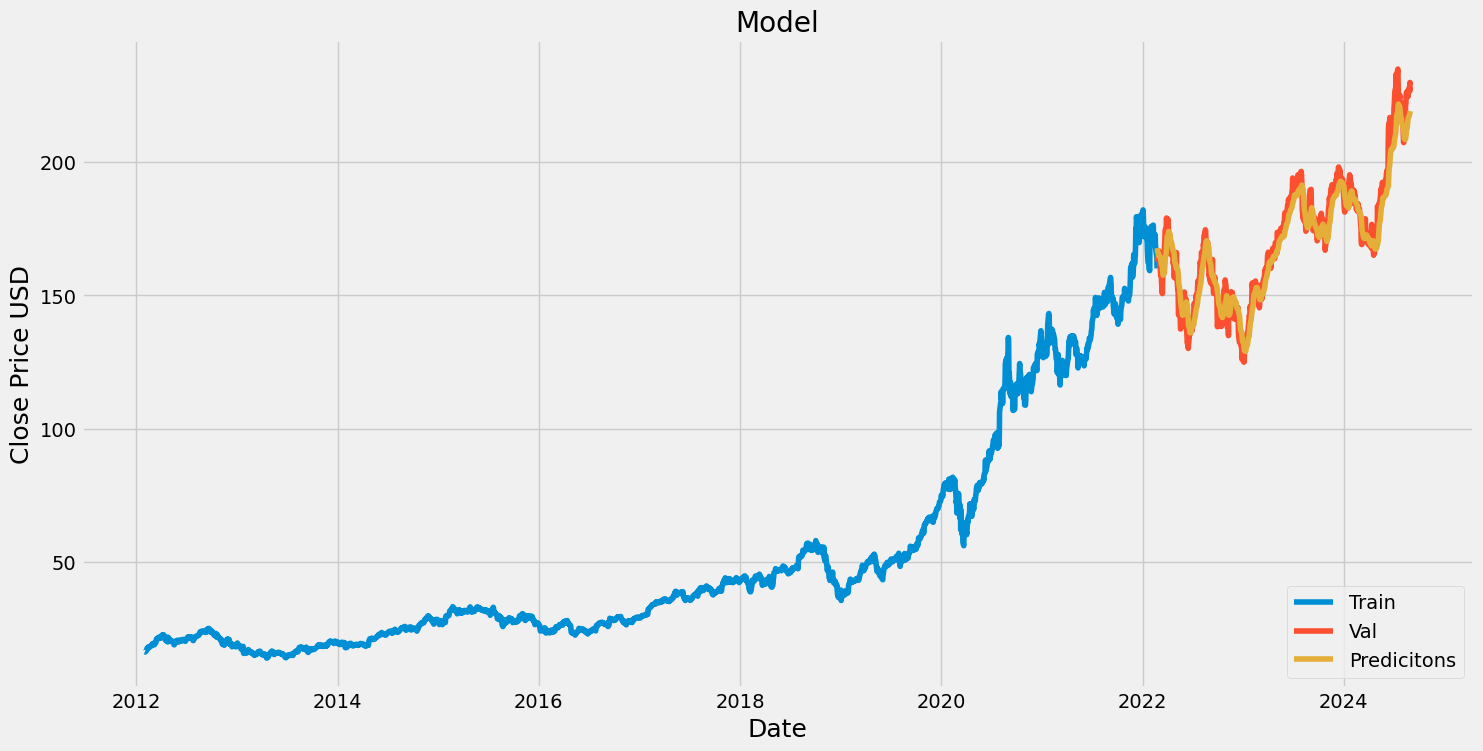

In [189]:
#Plotting data
train = data[0:training_data_len]
valid= data[training_data_len:]
valid['Predictions']=predictions

#visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)

#Giving data to plot
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predicitons'], loc='lower right')
plt.show()

In [190]:
#Showing actual and predicted prices
valid

,Close,Predictions
Date,,
2022-02-24,162.740005,167.674606
2022-02-25,164.850006,166.452637
2022-02-28,165.119995,165.631027
2022-03-01,163.199997,165.104065
2022-03-02,166.559998,164.586792
...,...,...
2024-08-26,227.179993,217.199219
2024-08-27,228.029999,217.710663
2024-08-28,226.490005,218.222015


In [191]:

# Getting quote to predict future quote
apple_quote = yf.download('AAPL', start='2012-01-01', end=(dateToday))

# Creating a new dataframe with the 'Close' column
new_df = apple_quote.filter(['Close'])

# Getting the last 60 days' values and creating an array
last_60_days = new_df[-60:].values

# Ensure that the scaler is defined and fitted on previous data
# Example: scaler = MinMaxScaler(feature_range=(0, 1))
#          scaler.fit(training_data)

# Scaling the data to be between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Creating an empty list
X_test = []

# Appending last 60 days to the new list
X_test.append(last_60_days_scaled)

# Converting X_test dataset to a numpy array
X_test = np.array(X_test)

# Reshaping for LSTM model
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Getting predicted scaled price
pred_price = model.predict(X_test)

#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[219.45871]]


In [192]:
# Getting quote to predict future quote
apple_quote2 = yf.download('AAPL', start='2019-12-18', end=date.today())
print(apple_quote2['Close'])

[*********************100%***********************]  1 of 1 completed

Date
2019-12-18     69.934998
2019-12-19     70.004997
2019-12-20     69.860001
2019-12-23     71.000000
2019-12-24     71.067497
                 ...    
2024-08-26    227.179993
2024-08-27    228.029999
2024-08-28    226.490005
2024-08-29    229.789993
2024-08-30    229.000000
Name: Close, Length: 1183, dtype: float64
